<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/tapi-logo-small.png" />

This notebook free for educational reuse under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).

Created by [Firstname Lastname](https://) for the 2022 Text Analysis Pedagogy Institute, with support from the [National Endowment for the Humanities](https://neh.gov), [JSTOR Labs](https://labs.jstor.org/), and [University of Arizona Libraries](https://new.library.arizona.edu/).

For questions/comments/improvements, email author@email.address.<br />
____

# `NLP with spaCy` `2`

This is lesson `2` of 3 in the educational series on `Natural Language Processing (NLP)`. This notebook is intended `to teach the basics of NLP and the spaCy library.`. 

**Audience:** `Teachers` / `Learners` / `Researchers`

**Use case:** `Tutorial`

`Include the use case definition from [here](https://constellate.org/docs/documentation-categories)`

**Difficulty:** `Beginner`

`Beginner assumes users are relatively new to Python and Jupyter Notebooks. The user is helped step-by-step with lots of explanatory text.`

`Intermediate assumes users are familiar with Python and have been programming for 6+ months. Code makes up a larger part of the notebook and basic concepts related to Python are not explained.`

`Advanced assumes users are very familiar with Python and have been programming for years, but they may not be familiar with the process being explained.`

**Completion time:** `90 minutes`

**Knowledge Required:** 
```
* Python basics (variables, flow control, functions, lists, dictionaries)
```

**Knowledge Recommended:**
```
* Basic file operations (open, close, read, write)
```

**Learning Objectives:**
After this lesson, learners will be able to:
```
1. Understand spaCy Pipelines
2. Understand spaCy Components
3. Understand NER generally
```
**Research Pipeline:**
```
N/A
```
___

# Required Python Libraries
`List out any libraries used and what they are used for`
* [spaCy](https://spacy.io/) for performing [Natural Language Processing (NLP)](https://docs.constellate.org/key-terms/#nlp).

## Install Required Libraries

In [1]:
### Install Libraries ###

# Using !pip installs
!pip install spacy
!python -m spacy download en_core_web_sm
# Using %%bash magic with apt-get and yes prompt

In [1]:
### Import Libraries ###
import spacy

c:\Users\wma22\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\wma22\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Introduction

```
Introduce the lesson topic. Answer questions such as:
* What are Token Attributes?
* Why are Attributes useful?
* What is a Pipeline?
* How do we create a spaCy pipeline?
* What is a spaCy component?
```

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
# Preparing our Doc Container once again
with open ("../data/wiki_us.txt", "r") as f:
    us_text = f.read()

doc = nlp(us_text)

## Sentence Boundary Detection (SBD)

In NLP, sentence boundary detection, or SBD, is the identification of sentences in a text. Again, this may seem fairly easy to do with rules. One could use split("."), but in English we use the period to also denote abbreviation. You could, again, write rules to look for periods not proceeded by a lowercase word, but again, I ask the question, "why bother?". We can use spaCy and in seconds have all sentences fully separated through SBD.

To access the sentences in the Doc container, we can use the attribute sents, like so:

In [4]:
for sent in doc.sents:
    print (sent)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j]
At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d]
The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world.
The national capital is Washington, D.C., and the most populous city is New York.


Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century.
The United States emerged from the thirteen British colonies es

Let's move forward with just one of these sentences. Let's try and grab index 0 in this attribute.

In [ ]:
sentence1 = doc.sents[0]
print (sentence1)

TypeError: 'generator' object is not subscriptable

In [5]:
doc.sents

Uh oh! We got an error. That is because the sents attribute is a generator. It is beyond the scope of this notebook to explain what generators are or how they work. Instead, let's convert our genreator into a list so that we can work with it by each index.

In [7]:
sentence1 = list(doc.sents)[0]
print(sentence1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


Now we have the first sentence. Now that we have a smaller text, let's explore spaCy's other building block, the token.

# Part One: Attributes

Let's try and create a doc container of just `sentence1 for the moment. To do this, we can pass `sentence1`.

In [8]:
doc_sentence1 = nlp(sentence1)

ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'spacy.tokens.span.Span'>

When we do this, wew get another error! Why is that? It's important to understand that we are receiving this error because `sentence1`, while it may look like text (see code snipet below)...

In [9]:
sentence1

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.

it is in fact, a special container. This means we want to work with the actual raw text of the object, we need to access the raw text. This is stored in an attribute (see below), or a special piece of data attached to this container. The attribute name is `text`. To access the raw text, we can use `.text`.

In [10]:
sentence1.text

'The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.'

Notice that in my JupyterNotebook, we can see the quotes before and after this text, unlike above. This indicates that the object that has been printed off is a string. We can also use Python's built-in `type` function to test this as well.

In [12]:
type(sentence1)

spacy.tokens.span.Span

In [13]:
type(sentence1.text)

str

Notice that we can see that sentence1 is a `spacy.tokens.span.Span`, a special kind of object. When we examine `sentence1.text`, we see that it is a `str`, or string. This is always important to remember. I still make this mistake when working with spaCy. There is a chance you will too and that is perfectly okay and expected. It is important to be able to recognize why this error occurs so that you can debug it quickly and effectively.

## Token Attributes

The token object contains a lot of different attributes that are VITAL to performing NLP in spaCy. We will be working with a few of them, such as:

* .text
* .head
* .left_edge
* .right_edge
* .ent_type_
* .iob_
* .lemma_
* .morph
* .pos_
* .dep_
* .lang_

I will briefly describe these here and show you how to grab each one and what they look like. We will be exploring each of these attributes more deeply in this chapter and future chapters. To demonstrate each of these attributes, we will use one token, "States" which is part of a sequence of tokens that make up "The United States of America". You can find a full list [here](https://spacy.io/api/token#attributes).

In [14]:
token2 = sentence1[2]
print (token2)

States


### Text

```Verbatim text content.``` -spaCy docs

In [15]:
token2.text

'States'

### Head

```The syntactic parent, or “governor”, of this token.``` -spaCy docs

In [16]:
token2.head

is

This tells to which word it is governed by, in this case, the primary verb, "is", as it is part of the noun subject.

### Left Edge

``` The leftmost token of this token’s syntactic descendants.``` -spaCy docs

In [17]:
token2.left_edge

The

If part of a sequence of tokens that are collectively meaningful, known as **multi-word tokens**, this will tell us where the multi-word token begins.

### Right Edge

``` The rightmost token of this token’s syntactic descendants.``` -spaCy docs

In [18]:
token2.right_edge

,

This will tell us where the multi-word token ends.

### Entity Type

``` Named entity type.``` -spaCy docs

In [19]:
token2.ent_type

384

Note the absence of the _ at the end of the attribute. This will return an integer that corresponds to an entity type, where as _ will give you the string equivalent., as in below.

In [20]:
token2.ent_type_

'GPE'

We will learn all about types of entities in our chapter on named entity recognition, or NER. For now, simply understand that GPE is geopolitical entity and is correct.

### Ent IOB

```IOB code of named entity tag. “B” means the token begins an entity, “I” means it is inside an entity, “O” means it is outside an entity, and "" means no entity tag is set.```

In [21]:
token2.ent_iob_

'I'

IOB is a method of annotating a text. In this case, we see "I" because states is inside an entity, that is to say that it is part of the United States of America.

### Lemma

```Base form of the token, with no inflectional suffixes.``` -spaCy docs

In [22]:
token2.lemma_

'States'

In [23]:
sentence1[12].lemma_

'know'

### Morph

```Morphological analysis``` -spaCy docs

In [24]:
sentence1[12].morph

Aspect=Perf|Tense=Past|VerbForm=Part

### Part of Speech

```Coarse-grained part-of-speech from the Universal POS tag set.``` -spaCy docs

In [25]:
token2.pos_

'PROPN'

### Syntactic Dependency

```Syntactic dependency relation.``` -spaCy docs. You can find a full list [here](https://spacy.io/models/en)

In [26]:
token2.dep_

'nsubj'

### Language

```Language of the parent document’s vocabulary.``` -spaCy docs

In [ ]:
token2.lang_

## What Assigns these Attributes?

In order to understand how these attributes are assigned to each token, let's take a look at a standard spaCy pipeline.

### What's a Pipeline? (from Day 1)

You may hear the words spaCy model or spaCy pipeline used quite often. Let's jump into what these words mean. A model refers to a machine learning model, or a statistical model that is trained to do a specific task. A pipeline is a sequence of models, rules, or listeners that are leverage things done to date by prior components in a pipeline.

On spaCy's main page, they use the following image to represent a standard non-transformer pipeline (small, medium, and large pipelines).

![spaCy pipeline](https://spacy.io/images/pipeline-design.svg)

Imagine a string (a text) going through this pipeline beginning at the left. As it moves down stream through each component to the right, the text is mutated. Each component in this image has a specific role and changes the text in different ways. Throughout the next few we eks, we will learn a lot more about these components and how to build some of our own, but for now, let's just stick with the basics.

When the text goes into the model, it is first converted into a vector representation of a document. We will learn a lot more about word vectors and document vectors in week 3 when we dive into machine learning. For now, think of a vector representation of a text as something that allows for the spaCy pipeline to numerically understand the meaning of a text. These are complex multi-dimensional numbers.

Later components are able to use these vectors, meaning they can be trained to perform individual tasks. These are the listener components that are trained to recognize things like parts-of-speech and lemmas of words so that when a text that was not used in the training data is given to the spaCy pipeline it can make accurate (hopefully!) predictions.

It is important to keep this image in your mind as we work through spaCy because it is important to understand that sequence is absolutely essential. If you are designing a custom spaCy component that needs to use the lemmas of a word to do a specific task, then you need to make sure that component sits after the lemmatizer.

### Model vs. Pipeline

When we use the term `pipeline`, we are referring to this entire sequence of steps that we can see in the image above. When we use the term `model`, we are referring to a specific component in the spaCy pipeline. These are things like the individual parser or named entity recognition model.

Often, you will ear `en_core_web_sm` and others like it also called `models`. This can be quite confusing. This contains a statistical model as well as a pipeline for processing texts.

### Steps for Annotation

When a text goes through this pipeline it hits each of these pipes or models in turn.

#### Tokenizer

The very first thing that happens to a text is it is tokenized, or converted into a series of tokens. These are things like words, punctuation marks, etc. How this is done, is dependent on the language. For a lot of Latin script languages, whitespaces are good indicators of token breaks, but they are not consistent, as we saw on Day 1. The most complex task in tokenization is how to handle punctuation marks. As we also saw on Day 1, periods can function as a syntactic part of a sentence, such as the end of a sentence, but also as markers for abbreviations. The same is true for dashes. Is the dash a hyphen in a hyphenated word or is it a dash that indicates the syntactic change in the flow of a sentence? These are tasks left to the tokenizer.


#### Tagger

In a pipeline the original data is modified and passed to the next pipe. The tokenized text is then passed to the `tagger`. The tagger will assign the part-of-speech for a given token. These can be things like `NOUN`, `VERB`, etc.

#### Parser

The parser's job in the pipeline is to essentially build off the tagger. It's goal is to take the grammatical information of the tagger and assign deeper meaning to it by showing how each token is related to other tokens in the text. It's goal, therefore, is to find what we call syntactic dependencies (we will see this below).


#### Lemmatizer

The lemmatizer then examines this data and allocates lemmas, or base form. This lets us ensure that all words that may have different forms in inflected languages are represented in the precise same way. In many spaCy pipelines, the lemmatizer is a look-up table, or rules-based approach to allocating a lemma to an individual word.


#### Named Entity Recognition (NER)

The purpose of this final pipe is to identify all entities in a text an assign a label to them. We will do a deep dive into this later in the notebook.

### Accessing the Data

As the text exits the pipeline it has all the information obtained from each of these steps. We can examine these steps with `nlp.analyze_pipes()`.

In [28]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  'tagger': [],
  'parser': [],
  'attribute_ruler': [],
  'lemmatizer': [],
  'ner': []},
 'att

Let's now jump into how we can access this data at the token level.

# Part Two: Part of Speech Tagging (POS)

In the field of computational linguistics, understanding parts-of-speech is essential. SpaCy offers an easy way to parse a text and identify its parts of speech. Below, we will iterate across each token (word or punctuation) in the text and identify its part of speech. You can find a full list [here](https://github.com/explosion/spaCy/blob/master/spacy/glossary.py)

In [32]:
for token in sentence1:
    print (token.text, token.pos_, token.dep_)

The DET det
United PROPN compound
States PROPN nsubj
of ADP prep
America PROPN pobj
( PUNCT punct
U.S.A. PROPN appos
or CCONJ cc
USA PROPN conj
) PUNCT punct
, PUNCT punct
commonly ADV advmod
known VERB acl
as ADP prep
the DET det
United PROPN compound
States PROPN pobj
( PUNCT punct
U.S. PROPN appos
or CCONJ cc
US PROPN conj
) PUNCT punct
or CCONJ cc
America PROPN conj
, PUNCT punct
is AUX ROOT
a DET det
country NOUN attr
primarily ADV advmod
located VERB acl
in ADP prep
North PROPN compound
America PROPN pobj
. PUNCT punct


Here, we can see two vital pieces of information: the string and the corresponding part-of-speech (pos). For a complete list of the pos labels, see the spaCy documentation (https://spacy.io/api/annotation#pos-tagging). Most of these, however, should be apparent, i.e. PROPN is proper noun, AUX is an auxiliary verb, ADJ, is adjective, etc. We can visualize this sentence with a diagram through spaCy's displaCy Notebook feature.

In [7]:
from spacy import displacy

In [8]:
displacy.render(sentence1, style="dep")

This can be a bit difficult to parse visually. Fortunately, spaCy has a solution to this. We can pass a special dictionary of options to displacy to make it a bit more compact. The `compact` key expects a Boolean. True will turn it into compact mode. The `distance` key sets the width of the entire output. Adjust this as you see fit.

In [13]:
displacy.render(sentence1, style="dep", options={"compact": True, "distance": 100})

In [15]:
for token in sentence1:
    if token.dep_ == "nsubj":
        print (token, token.head)

States is


### Applying the Dependency Parser

In [25]:
active_subj = "The boy ran to the house"
doc_active = nlp(active_subj)
displacy.render(doc_active, style="dep", options={"compact": True, "distance": 100})

In [24]:
for token in doc_subj:
    if token.dep_ == "nsubj":
        print (token, token.head)

boy ran


In [28]:
passive_subj = "The boy was tossed the ball"
doc_passive = nlp(passive_subj)
for token in doc_passive:
    if token.dep_ == "nsubj":
        print (token, token.head)

In [29]:
displacy.render(doc_passive, style="dep", options={"compact": True, "distance": 100})

In [32]:
for token in doc_passive:
    if token.dep_ == "nsubjpass":
        print (token, token.head)

boy tossed


# Part Three: Named Entity Recognition

Another essential task of NLP, is named entity recognition, or NER. I spoke about NER in the last notebook. Here, I’d like to demonstrate how to perform basic NER via spaCy. Again, we will iterate over the doc object as we did above, but instead of iterating over doc.sents, we will iterate over doc.ents. For our purposes right now, I simply want to print off each entity’s text (the string itself) and its corresponding label (note the _ after label). WE will learn much more about this process in weeks 2 and 3.

To see the labels available to us with our model, we can grab the ner pipe by using `nlp.get_pipe()` and then call the labels available to that pipe.

In [75]:
nlp.get_pipe("ner").labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [34]:
for ent in sentence1.ents:
    print (ent.text, ent.label_)

The United States of America GPE
U.S.A. GPE
USA GPE
the United States GPE
U.S. GPE
US GPE
America GPE
North America LOC


Sometimes it can be difficult to read this output as raw data. In this case, we can again leverage spaCy's displaCy feature. Notice that this time we are altering the keyword argument, style, with the string "ent". This tells displaCy to display the text as NER annotations

In [35]:
displacy.render(sentence1, style="ent")

## Fun Examples of Use Cases

In [60]:
# Import necessary libraries
from collections import Counter
import matplotlib.pyplot as plt
import urllib.request

url = "https://www.gutenberg.org/cache/epub/51060/pg51060.txt"
response = urllib.request.urlopen(url)
txt = response.read().decode('utf8')

txt = txt.split("PREFACE.", 1)[1].split("THE END.")[0]
len(txt)


408377

In [61]:
doc_poe = nlp(txt)

### Find the Most Common Tokens

Word: found, Frequency: 172
Word: water, Frequency: 150
Word: Augustus, Frequency: 135
Word: time, Frequency: 130
Word: Peters, Frequency: 127
Word: great, Frequency: 111
Word: sea, Frequency: 108
Word: having, Frequency: 97
Word: vessel, Frequency: 96
Word: way, Frequency: 92


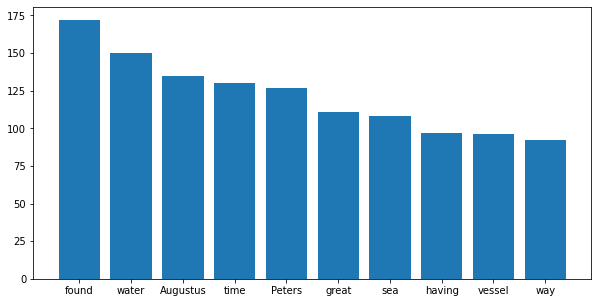

In [62]:

# 1. Iterate through each token (word or punctuation) in the processed document
# 2. Check if the token is not a stop word, not punctuation, and is an alphabetic character
# 3. If it is, add it to our list as token.text (the actual word)
# This gives us a list of all words in the document, excluding stop words, punctuation, and non-alphabetic characters

words = []  # create an empty list to store the words
for token in doc_poe:  # loop over all tokens (words and punctuation) in the document
    if not token.is_stop and not token.is_punct and token.text.isalpha():  # check the conditions
        words.append(token.text)  # if the conditions are met, add the word to the list

# Now, let's count the frequency of each word in our list using Counter from the collections library
word_freq = Counter(words)  # this creates a dictionary-like object where keys are words and values are frequencies

# We can now print the 10 most common words with their frequencies
for word, frequency in word_freq.most_common(10):
    print(f"Word: {word}, Frequency: {frequency}")

# Let's visualize this data using a bar plot from matplotlib library
# First, we create a figure and set its size
plt.figure(figsize=(10,5))

# Next, we create a bar plot
# word_freq.most_common(10) gives us a list of tuples, where each tuple is a word-frequency pair
# zip(*word_freq.most_common(10)) unzips this list into two separate lists: one for words and one for frequencies
# These lists are then used as arguments for the bar plot
plt.bar(*zip(*word_freq.most_common(10)))

# We finally display the plot with plt.show()
plt.show()


### Find the Most Common Lemmas

Lemma: find, Frequency: 214
Lemma: great, Frequency: 156
Lemma: water, Frequency: 152
Lemma: time, Frequency: 141
Lemma: Augustus, Frequency: 135
Lemma: come, Frequency: 129
Lemma: take, Frequency: 128
Lemma: Peters, Frequency: 127
Lemma: see, Frequency: 126
Lemma: sea, Frequency: 120


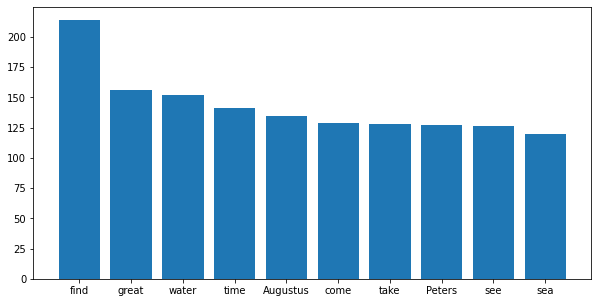

In [63]:
# 1. Iterate through each token (word or punctuation) in the processed document
# 2. Check if the token is not a stop word, not punctuation, and its lemma is an alphabetic character
# 3. If these conditions are met, add the lemma of the token to our list as token.lemma_ (the root form of the word)
# This will give us a list of all lemmas (root forms) in the document, excluding stop words, punctuation, and non-alphabetic characters

lemmas = []  # create an empty list to store the lemmas
for token in doc_poe:  # loop over all tokens (words and punctuation) in the document
    if not token.is_stop and not token.is_punct and token.lemma_.isalpha():  # check the conditions
        lemmas.append(token.lemma_)  # if the conditions are met, add the lemma to the list

# Now, let's count the frequency of each lemma in our list using Counter from the collections library
lemma_freq = Counter(lemmas)  # this creates a dictionary-like object where keys are lemmas and values are frequencies

# We can now print the 10 most common lemmas with their frequencies
for lemma, frequency in lemma_freq.most_common(10):
    print(f"Lemma: {lemma}, Frequency: {frequency}")

# Let's visualize this data using a bar plot from matplotlib library
# First, we create a figure and set its size
plt.figure(figsize=(10,5))

# Next, we create a bar plot
# lemma_freq.most_common(10) gives us a list of tuples, where each tuple is a lemma-frequency pair
# zip(*lemma_freq.most_common(10)) unzips this list into two separate lists: one for lemmas and one for frequencies
# These lists are then used as arguments for the bar plot
plt.bar(*zip(*lemma_freq.most_common(10)))

# We finally display the plot with plt.show()
plt.show()

### Find the Most Common Proper Nouns

Proper Noun: Augustus, Frequency: 135
Proper Noun: Peters, Frequency: 127
Proper Noun: Captain, Frequency: 61
Proper Noun: Guy, Frequency: 30
Proper Noun: Mr., Frequency: 28
Proper Noun: Parker, Frequency: 28
Proper Noun: W., Frequency: 24
Proper Noun: CHAPTER, Frequency: 22
Proper Noun: Tiger, Frequency: 21
Proper Noun: Too, Frequency: 21


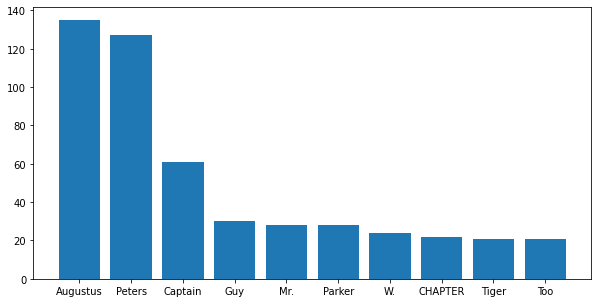

In [64]:
# 1. Iterate through each token in the processed document
# 2. Check if the token is a proper noun by looking at its POS tag
# 3. If it is a proper noun, add it to our list as token.text

proper_nouns = []  # create an empty list to store the proper nouns
for token in doc_poe:  # loop over all tokens in the document
    if token.pos_ in ['PROPN']:  # check if the token's POS tag is 'PROPN'
        proper_nouns.append(token.text)  # if it is, add the token text to the list

# Now, let's count the frequency of each proper noun in our list using Counter from the collections library
proper_noun_freq = Counter(proper_nouns)  # this creates a dictionary-like object where keys are proper nouns and values are frequencies

# We can now print the 10 most common proper nouns with their frequencies
for proper_noun, frequency in proper_noun_freq.most_common(10):
    print(f"Proper Noun: {proper_noun}, Frequency: {frequency}")

# Let's visualize this data using a bar plot from matplotlib library
# First, we create a figure and set its size
plt.figure(figsize=(10,5))

# Next, we create a bar plot
# proper_noun_freq.most_common(10) gives us a list of tuples, where each tuple is a proper noun-frequency pair
# zip(*proper_noun_freq.most_common(10)) unzips this list into two separate lists: one for proper nouns and one for frequencies
# These lists are then used as arguments for the bar plot
plt.bar(*zip(*proper_noun_freq.most_common(10)))

# We finally display the plot with plt.show()
plt.show()

### Find the Most Frequent Entity for each Category

Entity: MONEY: ninety
dollars, Frequency: 1
Entity: LAW: CHAPTER II, Frequency: 1
Entity: ORG: Augustus, Frequency: 81
Entity: LANGUAGE: English, Frequency: 2
Entity: CARDINAL: one, Frequency: 107
Entity: QUANTITY: fifty feet, Frequency: 6
Entity: ORDINAL: first, Frequency: 83
Entity: LOC: Antarctic, Frequency: 7
Entity: EVENT: Christmas, Frequency: 4
Entity: NORP: American, Frequency: 7
Entity: TIME: noon, Frequency: 11
Entity: WORK_OF_ART: Penguin, Frequency: 1
Entity: PRODUCT: Harbour, Frequency: 3
Entity: GPE: Nantucket, Frequency: 13
Entity: DATE: the day, Frequency: 16
Entity: PERSON: Peters, Frequency: 112
Entity: FAC: the Jane Guy, Frequency: 3


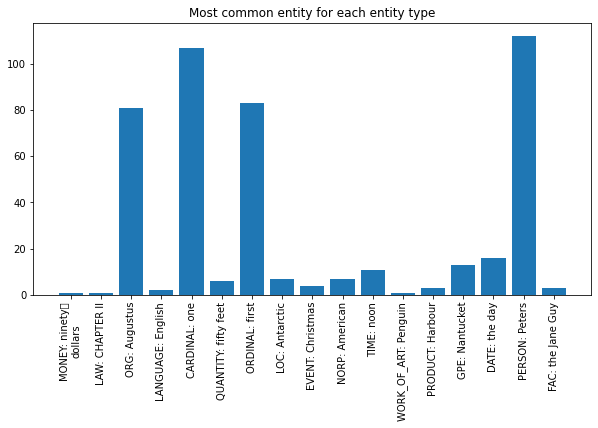

In [70]:
# 1. Iterate through all named entities in the document
# 2. Add each named entity to a list as (entity.text, entity.label_)

entities = []  # create an empty list to store the entities
for ent in doc_poe.ents:  # loop over all named entities in the document
    entities.append((ent.text, ent.label_))  # add the entity text and label to the list

# For each entity type, we find the most common entity of that type
most_common_entities = {}  # create an empty dictionary to store the most common entities
for entity_type in set(entity[1] for entity in entities):  # loop over each unique entity type
    # get a Counter of entities of this type
    entities_of_this_type = Counter(entity[0] for entity in entities if entity[1] == entity_type)
    # get the most common entity of this type
    most_common_entity = entities_of_this_type.most_common(1)[0]
    # add it to the dictionary
    most_common_entities[f"{entity_type}: {most_common_entity[0]}"] = most_common_entity[1]

# We can now print the most common entity for each entity type
for entity, frequency in most_common_entities.items():
    print(f"Entity: {entity}, Frequency: {frequency}")

# Let's create a bar plot of the most common entity for each type
plt.figure(figsize=(10,5))  # create a new figure for the plot
plt.bar(most_common_entities.keys(), most_common_entities.values())  # create a bar chart
plt.xticks(rotation=90)  # rotate the x-axis labels for better readability
plt.title("Most common entity for each entity type")  # set the title of the plot
plt.show()  # display the plot